In [33]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [34]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [35]:


df = lib_copy.fetch_ohlcv("JPM", "2018-01-12", "2019-06-12")

In [36]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [37]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [38]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [39]:
# Filling missing values with the previous ones
everything = df.dropna()


In [40]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data

In [41]:
X = final_df.iloc[:, 0:22].values
y = final_df.iloc[:, :1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [42]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[1.12470000e+02 1.12650000e+02 1.12420000e+02 1.12440000e+02
  2.57080000e+04 1.12271500e+02 3.77122415e-01 1.13025745e+02
  1.11517255e+02 1.12480000e+02 2.30000000e-01 4.55826776e-01
  4.55826776e-01 1.12271500e+02 1.12727327e+02 1.11815673e+02
  1.12407866e+02 1.12305010e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.12420000e+02 1.12500000e+02 1.12250000e+02 1.12470000e+02
  2.00770000e+04 1.12295000e+02 3.73944128e-01 1.13042888e+02
  1.11547112e+02 1.12440000e+02 2.50000000e-01 4.36803875e-01
  4.36803875e-01 1.12295000e+02 1.12731804e+02 1.11858196e+02
  1.12420293e+02 1.12320009e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.12460000e+02 1.12480000e+02 1.12270000e+02 1.12390000e+02
  2.48480000e+04 1.12316000e+02 3.66450255e-01 1.13048901e+02
  1.11583099e+02 1.12470000e+02 2.10000000e-01 4.16273237e-01
  4.16273237e-01 1.12316000e+02 1.12732273e+02 1.11899727e+02
  1.12414235e+02 1.12326371e+02 0.00000000e+00 0.

In [43]:
 # Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [44]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [45]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [46]:
# Model set-up
number_input_features = 22
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5 
hidden_nodes_layer3 = 2

In [47]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid")) 

In [48]:
# Compile the model
import tensorflow as tf

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [49]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                345       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Training the model
batch_size = 1000
epochs = 50
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

===========================] - 0s 7ms/step - loss: -63.7946 - accuracy: 0.0000e+00 - tp: 5079.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 8.0000 - precision: 1.0000 - recall: 0.9984 - auc: 0.0000e+00 - val_loss: -72.8427 - val_accuracy: 0.0000e+00 - val_tp: 1696.0000 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: -77.8398 - accuracy: 0.0000e+00 - tp: 5087.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - auc: 0.0000e+00 - val_loss: -88.0052 - val_accuracy: 0.0000e+00 - val_tp: 1696.0000 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: -93.5355 - accuracy: 0.0000e+00 - tp: 5087.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - precisio

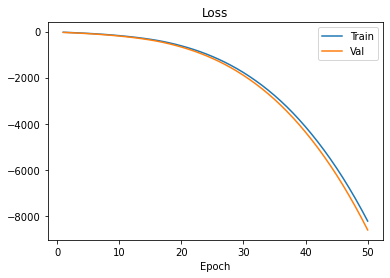

In [51]:
 # Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

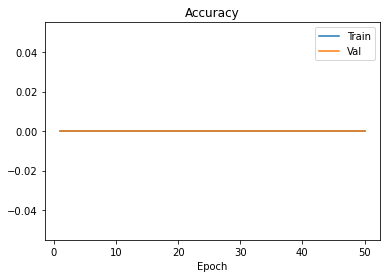

In [52]:
 # Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

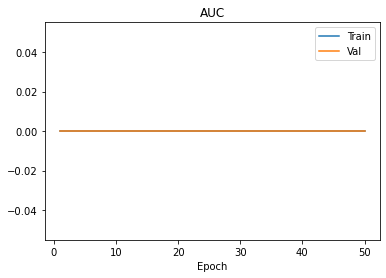

In [53]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC") 

In [54]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc 

In [55]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000) 

In [56]:
 # Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': -8695.1298828125,
 'accuracy': 0.0,
 'tp': 2261.0,
 'tn': 0.0,
 'fp': 0.0,
 'fn': 0.0,
 'precision': 1.0,
 'recall': 1.0,
 'auc': 0.0}

In [57]:
# x_var_list = ["open","high","low","volume","bollinger_band_middle","bollinger_band_std","bollinger_band_upper","bollinger_band_lower","close_-1_s","tr","tr_14_smma","atr","kcmid","kcup","kclo","EMA9","EMA21","squeeze","crossup","crossdown","target","io_target"]

In [58]:
"""
# Construct training start and training end dates

training_start = pd.to_datetime("2018-01-12").date()
training_end = pd.to_datetime('2019-01-11').date()

# Construct test start and test end dates

testing_start = pd.to_datetime('2019-01-12').date()
testing_end = pd.to_datetime('2019-06-12').date()

# Construct validating start and validating end dates

vali_start = pd.to_datetime('2019-06-13').date()
vali_end = pd.to_datetime('2020-01-12').date()

# Confirming training, testing and validating dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")
print(f"validating Start: {vali_start}")
print(f"validating end: {vali_end}")

"""

'\n# Construct training start and training end dates\n\ntraining_start = pd.to_datetime("2018-01-12").date()\ntraining_end = pd.to_datetime(\'2019-01-11\').date()\n\n# Construct test start and test end dates\n\ntesting_start = pd.to_datetime(\'2019-01-12\').date()\ntesting_end = pd.to_datetime(\'2019-06-12\').date()\n\n# Construct validating start and validating end dates\n\nvali_start = pd.to_datetime(\'2019-06-13\').date()\nvali_end = pd.to_datetime(\'2020-01-12\').date()\n\n# Confirming training, testing and validating dates\nprint(f"Training Start: {training_start}")\nprint(f"Training End: {training_end}")\nprint(f"Testing Start: {testing_start}")\nprint(f"Testing End: {testing_end}")\nprint(f"validating Start: {vali_start}")\nprint(f"validating end: {vali_end}")\n\n'

In [59]:
# Construct the X_train and y_train datasets
"""
X_train = final_df[x_var_list][training_start:training_end]
y_train = final_df['close'][training_start:training_end]
X_test = final_df[x_var_list][testing_start:testing_end]
y_test = final_df['close'][testing_start:testing_end]
y_test, y_train = np.array(y_test).reshape(-1,1), np.array(y_train).reshape(-1,1)
X_test, x_train = np.array(X_test), np.array(X_train).reshape(-1,1)
"""

"\nX_train = final_df[x_var_list][training_start:training_end]\ny_train = final_df['close'][training_start:training_end]\nX_test = final_df[x_var_list][testing_start:testing_end]\ny_test = final_df['close'][testing_start:testing_end]\ny_test, y_train = np.array(y_test).reshape(-1,1), np.array(y_train).reshape(-1,1)\nX_test, x_train = np.array(X_test), np.array(X_train).reshape(-1,1)\n"

In [60]:
"""
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
"""

'\n# Importing the MinMaxScaler from sklearn\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# Fit the MinMaxScaler object with the features data X\nscaler.fit(X)\n\n# Scale the features training and testing sets\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n\n# Fit the MinMaxScaler object with the target data Y\nscaler.fit(y)\n\n# Scale the target training and testing sets\ny_train = scaler.transform(y_train)\ny_test = scaler.transform(y_test)\n'

In [61]:
"""
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")
"""

'\n# Reshape the features data\nX_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))\nX_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))\n\n# Print some sample data after reshaping the datasets\nprint (f"X_train sample values:\n{X_train[:3]} \n")\nprint (f"X_test sample values:\n{X_test[:3]}")\n'

In [62]:
"""
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=hidden_nodes_layer1,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=hidden_nodes_layer2, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=hidden_nodes_layer3))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))
"""

'\n# Define the LSTM RNN model.\nmodel = Sequential()\n\n# Initial model setup\nnumber_units = 30\ndropout_fraction = 0.2\n\n# Layer 1\nmodel.add(LSTM(\n    units=hidden_nodes_layer1,\n    return_sequences=True,\n    input_shape=(X_train.shape[1], 1))\n    )\nmodel.add(Dropout(dropout_fraction))\n\n# Layer 2\nmodel.add(LSTM(units=hidden_nodes_layer2, return_sequences=True))\nmodel.add(Dropout(dropout_fraction))\n\n# Layer 3\nmodel.add(LSTM(units=hidden_nodes_layer3))\nmodel.add(Dropout(dropout_fraction))\n\n# Output layer\nmodel.add(Dense(1))\n'